In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../data/IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
df.isnull().sum().sort_values(ascending=False)

Revenue (Millions)    128
Metascore              64
Rank                    0
Title                   0
Description             0
Genre                   0
Director                0
Actors                  0
Runtime (Minutes)       0
Year                    0
Votes                   0
Rating                  0
dtype: int64

In [9]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [10]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median())

In [14]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].median())

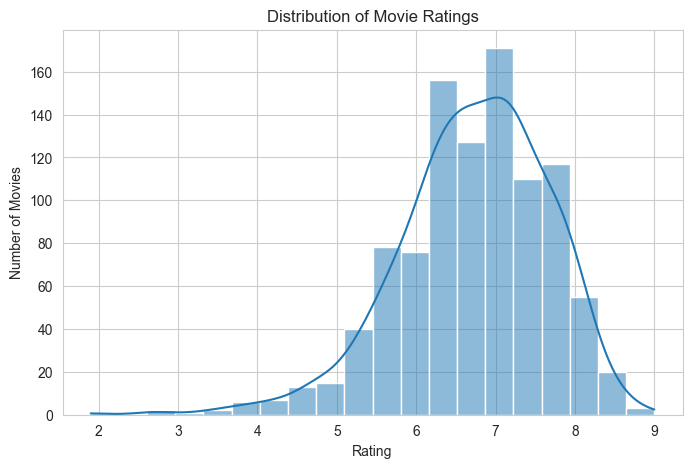

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

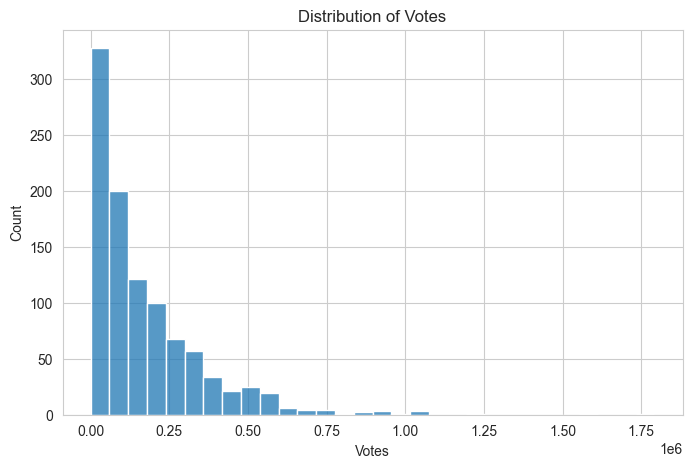

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Votes'], bins=30)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

In [18]:
df.sort_values(by='Votes', ascending=False)[
    ['Title', 'Rating', 'Votes']
].head(10)

,Title,Rating,Votes
54,The Dark Knight,9.0,1791916
80,Inception,8.8,1583625
124,The Dark Knight Rises,8.5,1222645
36,Interstellar,8.6,1047747
76,The Avengers,8.1,1045588
144,Django Unchained,8.4,1039115
77,Inglourious Basterds,8.3,959065
99,The Departed,8.5,937414
87,Avatar,7.8,935408
64,The Prestige,8.5,913152


In [19]:
top_rated = df[df['Votes'] >= 10000] \
    .sort_values(by='Rating', ascending=False) \
    [['Title', 'Rating', 'Votes']] \
    .head(10)

top_rated

,Title,Rating,Votes
54,The Dark Knight,9.0,1791916
80,Inception,8.8,1583625
117,Dangal,8.8,48969
96,Kimi no na wa,8.6,34110
249,The Intouchables,8.6,557965
36,Interstellar,8.6,1047747
124,The Dark Knight Rises,8.5,1222645
476,The Lives of Others,8.5,278103
99,The Departed,8.5,937414
133,Whiplash,8.5,477276


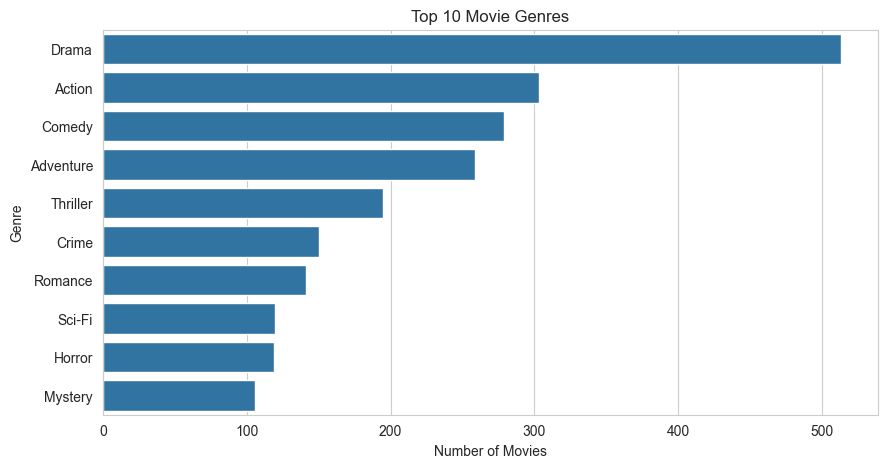

In [20]:
genre_series = df['Genre'].str.split(',').explode()

genre_counts = genre_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

In [21]:
genre_rating = (
    df.assign(Genre=df['Genre'].str.split(','))
      .explode('Genre')
      .groupby('Genre')['Rating']
      .mean()
      .sort_values(ascending=False)
)

genre_rating.head(10)

Genre
War          7.353846
Animation    7.324490
Biography    7.290123
History      7.127586
Music        7.075000
Sport        7.011111
Drama        6.953801
Musical      6.940000
Mystery      6.886792
Crime        6.786667
Name: Rating, dtype: float64

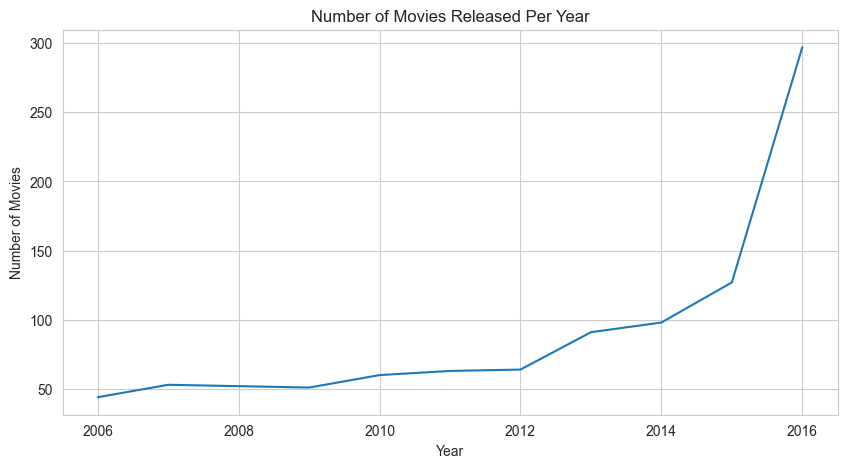

In [22]:
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

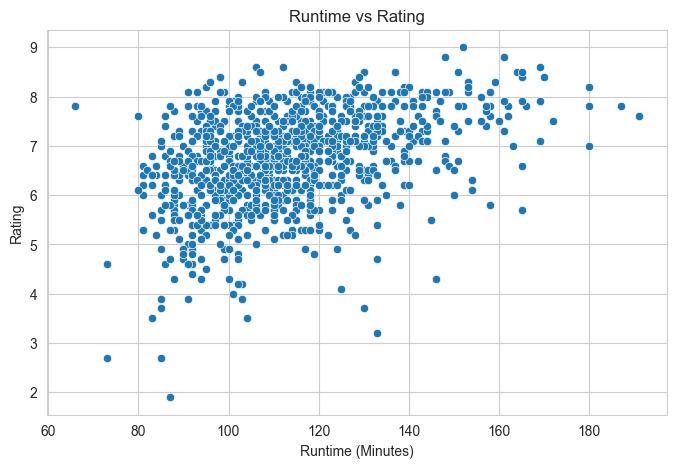

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=df)
plt.title("Runtime vs Rating")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Rating")
plt.show()

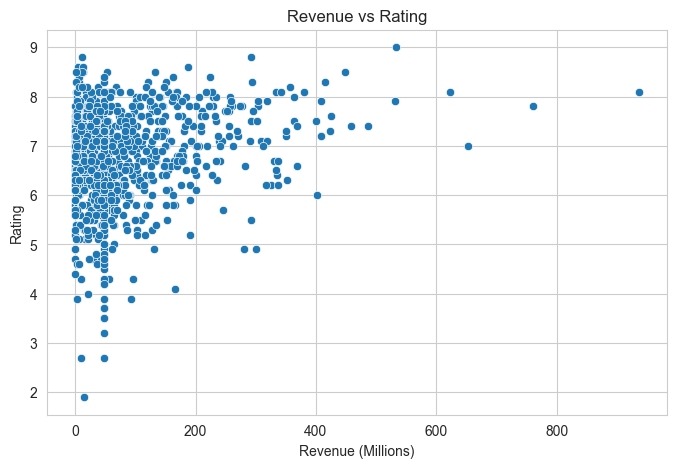

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Revenue (Millions)', y='Rating', data=df)
plt.title("Revenue vs Rating")
plt.xlabel("Revenue (Millions)")
plt.ylabel("Rating")
plt.show()

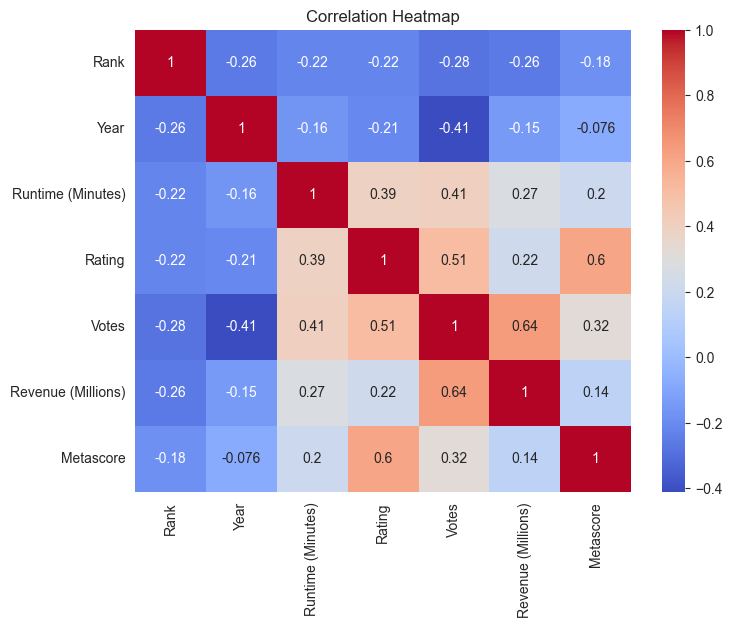

In [25]:
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()def recommend_movies(genre, min_rating=7.5, min_votes=10000):
    recommendations = df[
        (df['Genre'].str.contains(genre, case=False, na=False)) &
        (df['Rating'] >= min_rating) &
        (df['Votes'] >= min_votes)
    ][['Title', 'Genre', 'Rating', 'Votes']]
    
    return recommendations.sort_values(
        by=['Rating', 'Votes'], ascending=False
    ).head(10)


In [37]:
def recommend_movies(genre, min_rating=8.5, min_votes=100000):
    recommendations = df[
        (df['Genre'].str.contains(genre, case=False, na=False)) &
        (df['Rating'] >= min_rating) &
        (df['Votes'] >= min_votes)
    ][['Title', 'Genre', 'Rating', 'Votes']]
    
    return recommendations.sort_values(
        by=['Rating', 'Votes'], ascending=False
    ).head(10)

In [38]:
recommend_movies("Action")

,Title,Genre,Rating,Votes
54,The Dark Knight,"Action,Crime,Drama",9.0,1791916
80,Inception,"Action,Adventure,Sci-Fi",8.8,1583625
124,The Dark Knight Rises,"Action,Thriller",8.5,1222645


In [39]:
recommend_movies("Drama")

,Title,Genre,Rating,Votes
54,The Dark Knight,"Action,Crime,Drama",9.0,1791916
36,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1047747
249,The Intouchables,"Biography,Comedy,Drama",8.6,557965
99,The Departed,"Crime,Drama,Thriller",8.5,937414
64,The Prestige,"Drama,Mystery,Sci-Fi",8.5,913152
133,Whiplash,"Drama,Music",8.5,477276
476,The Lives of Others,"Drama,Thriller",8.5,278103
991,Taare Zameen Par,"Drama,Family,Music",8.5,102697
